In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.grid_search import GridSearchCV
from sklearn.feature_extraction.text import *
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import csv


Load merged data file with charging stations and ACS data aggregated by urban areas. Use raw count of stations as the labels (for now) and picked 10 attributes for modeling.Preprocessed the data into a csv file.

In [2]:
#import the processed urban area charging stations and ACS data
# to do: use imputer to handle missing vaules in scikit
# http://stackoverflow.com/questions/30317119/classifiers-in-scikit-learn-that-handle-nan-null?lq=1

#load urban area data
# input vectors for now, we use incentive, population, household, %owning houses, ...
X = np.loadtxt("data/parsed_urban_area_data_10.csv",delimiter = ',',usecols = (1,2,3,4,5,6,7,8,9,10)) 
#X = np.loadtxt("data/parsed_urban_area_data.csv",delimiter = ',',usecols = (1,3,4,5,6,7,8,9,10))
# Above line of code removes population and reran all the models. e.g., LinReg: score went up from 0.71 to 0.77
# The results were stable and robust so more confident to stick with raw station count as outcome variable
# labels. For now, we use station count
Y = np.loadtxt("data/parsed_urban_area_data_10.csv",delimiter = ',',usecols = (0,),dtype=float)  
# feature names
feaname = ["Incentive","Population","Households","% Owning Homes",
          "Households $150-200K","Households >$200K", "Total College Grads",
          "Total Graduate Degree","% College Grads","Median Income"] # feature names of the selected attributes

# checking input data and labels
print Y.shape, X.shape, len(X), X[4], Y[4]

# add shuffle code before splitting the data into train and dev sets
# easiest shuffle utility is sklearn shuffle function
from sklearn.utils import shuffle

# shuffle two arrays in unison
X, Y = shuffle(X, Y, random_state=0)
print Y.shape, X.shape, len(X), X[4], Y[4]
# double check the data type of the two arrays
print X.dtype, Y.dtype

# Split the imported data into training 75% and development data 25%

split = 3*len(X)/4

print len(X), split

train_data, train_labels = X[:split], Y[:split]
dev_data, dev_labels = X[split:], Y[split:]

print train_data.shape, train_labels.shape
print dev_data.shape, dev_labels.shape
print train_data[1], train_labels[1]
print dev_data[0], dev_labels[0]
# dev_dat=np.array(dev_data)
# print dev_dat.sum()
print feaname

(3590,) (3590, 10) 3590 [  0.00000000e+00   4.66600000e+03   1.79500000e+03   6.40668524e+01
   3.70000000e+01   1.60000000e+01   6.20000000e+00   6.40000000e+00
   1.51000000e+01   2.29230000e+04] 0.0
(3590,) (3590, 10) 3590 [  0.00000000e+00   1.65310000e+04   6.22000000e+03   6.48070740e+01
   9.80000000e+01   5.90000000e+01   1.20000000e+00   6.10000000e+00
   1.54000000e+01   2.80610000e+04] 0.0
float64 float64
3590 2692
(2692, 10) (2692,)
(898, 10) (898,)
[  1.00000000e+00   1.08350000e+04   4.37900000e+03   5.04224709e+01
   4.20000000e+01   1.02000000e+02   4.70000000e+00   8.80000000e+00
   1.93000000e+01   3.17510000e+04] 0.0
[  1.00000000e+00   5.19600000e+03   1.93300000e+03   5.91826177e+01
   1.80000000e+01   1.30000000e+01   3.00000000e-01   6.10000000e+00
   1.40000000e+01   2.05180000e+04] 0.0
['Incentive', 'Population', 'Households', '% Owning Homes', 'Households $150-200K', 'Households >$200K', 'Total College Grads', 'Total Graduate Degree', '% College Grads', 'Media

In [2]:
#import the processed urban area charging stations and ACS data
# to do: use imputer to handle missing vaules in scikit
# http://stackoverflow.com/questions/30317119/classifiers-in-scikit-learn-that-handle-nan-null?lq=1

#load urban area data
# input vectors for now, we use incentive, population, household, %owning houses, ...
X = np.loadtxt("data/parsed_urban_area_data_25.csv",delimiter = ',',usecols = (1,2,3,4,5,6,7,8,9,10,11,12,13,
                                                                              14,15,16,17,18,19,20,21,22,23,24,25)) 
#X = np.loadtxt("data/parsed_urban_area_data.csv",delimiter = ',',usecols = (1,3,4,5,6,7,8,9,10))
# Above line of code removes population and reran all the models. e.g., LinReg: score went up from 0.71 to 0.77
# The results were stable and robust so more confident to stick with raw station count as outcome variable
# labels. For now, we use station count
Y = np.loadtxt("data/parsed_urban_area_data_25.csv",delimiter = ',',usecols = (0,),dtype=float)  
# feature names
feaname = ["Incentive","Population","Households","% Owning Homes",
            "Households $50-60K","Households $60-75K","Households $75-100K",
           "Households $100-124K","Households $125-150K",
          "Households $150-200K","Households >$200K", "Total College Grads",
          "Total Graduate Degree","% College Grads",
           "Pop 18-24","Female 18-24","Pop 25-34","Female 25-34","Pop 35-44","Female 35-44",
           "Pop 45-64","Female 45-64","Pop >65","Female >65",
           "Median Income"] # feature names of the selected attributes

# checking input data and labels
print Y.shape, X.shape, len(X), X[4], Y[4]

# add shuffle code before splitting the data into train and dev sets
# easiest shuffle utility is sklearn shuffle function
from sklearn.utils import shuffle

# shuffle two arrays in unison
X, Y = shuffle(X, Y, random_state=0)
print Y.shape, X.shape, len(X), X[4], Y[4]
# double check the data type of the two arrays
print X.dtype, Y.dtype

# Split the imported data into training 75% and development data 25%

split = 3*len(X)/4

print len(X), split

train_data, train_labels = X[:split], Y[:split]
dev_data, dev_labels = X[split:], Y[split:]

print train_data.shape, train_labels.shape
print dev_data.shape, dev_labels.shape
print train_data[1], train_labels[1]
print dev_data[0], dev_labels[0]
# dev_dat=np.array(dev_data)
# print dev_dat.sum()
print feaname

(3590,) (3590, 25) 3590 [  0.00000000e+00   4.66600000e+03   1.79500000e+03   6.40668524e+01
   1.77000000e+02   7.10000000e+01   7.30000000e+01   7.00000000e+01
   8.00000000e+00   3.70000000e+01   1.60000000e+01   6.20000000e+00
   6.40000000e+00   1.51000000e+01   4.86000000e+02   3.48000000e+02
   4.29000000e+02   1.96000000e+02   5.57000000e+02   3.34000000e+02
   1.31500000e+03   7.29000000e+02   7.74000000e+02   4.81000000e+02
   2.29230000e+04] 0.0
(3590,) (3590, 25) 3590 [  0.00000000e+00   1.65310000e+04   6.22000000e+03   6.48070740e+01
   4.59000000e+02   7.82000000e+02   7.37000000e+02   2.80000000e+02
   1.50000000e+02   9.80000000e+01   5.90000000e+01   1.20000000e+00
   6.10000000e+00   1.54000000e+01   2.05800000e+03   1.00600000e+03
   2.81300000e+03   1.17100000e+03   1.88400000e+03   8.97000000e+02
   3.47800000e+03   1.81400000e+03   1.84700000e+03   1.05600000e+03
   2.80610000e+04] 0.0
float64 float64
3590 2692
(2692, 25) (2692,)
(898, 25) (898,)
[  1.00000000e+0

('Coefficients: \n', array([  2.07445151e-01,  -7.08181656e-04,   1.44312935e-04,
        -1.23681820e-02,  -9.10027428e-04,   5.66183972e-04,
         2.84050324e-04,   6.88520297e-04,  -9.31465321e-04,
         3.08906386e-03,  -2.41752720e-03,   3.01475476e-02,
         1.47923574e-02,   2.55545977e-02,  -1.49568427e-03,
         4.78951675e-03,   3.54251992e-03,  -6.53040360e-03,
         3.85940389e-03,  -2.68715123e-03,   1.09397850e-03,
        -1.09019442e-03,   3.33127214e-03,  -4.79137524e-03,
        -2.80168786e-06]))
Variance score: 0.69
(898,) (898,)
0.0 361.0 -25.2155246163 360.366326612 -50.0789942709 800.873880507


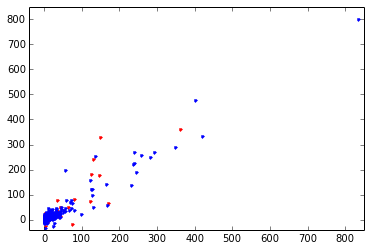

In [3]:
# try lineary regression mode
from sklearn import datasets, linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(train_data, train_labels)

# The coefficients
print('Coefficients: \n', regr.coef_)

# score
print('Variance score: %.2f' % regr.score(dev_data, dev_labels))

# predict the dev data set
dev_predictions=regr.predict(dev_data)
print dev_predictions.shape, dev_labels.shape
train_predict = regr.predict(train_data)
# print dev_predictions[0], dev_labels[0]
print np.amin(dev_labels), np.amax(dev_labels), np.amin(dev_predictions), np.amax(dev_predictions), np.amin(train_predict), np.amax(train_predict)


# visualize predicted vs actual labels
import matplotlib.pyplot as plt
plt.axis([-40, 850, -40, 850])
plt.plot(dev_labels, dev_predictions, 'r.')
plt.plot(train_labels, train_predict, 'b.')
plt.show()

Interpretation of the Linear Regression model: TBD.

(898, 71) (898,)
0.704899777283
(898,) (898,)
0.0 361.0 0.0 244.0 0.0 835.0


/Library/Python/2.7/site-packages/sklearn/linear_model/base.py:239: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


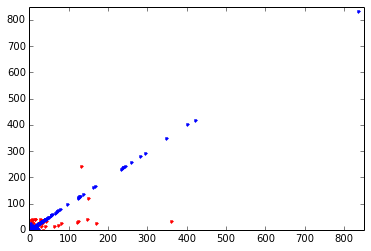

In [4]:
# model with logistic regression 
#
logreg = LogisticRegression(penalty='l1', C=1.0, tol=0.01) 
logreg.fit(train_data, train_labels)

# examine predict prob for test data
print logreg.predict_proba(dev_data).shape, dev_labels.shape

# coeff_ for predictor, e.g., 0th=incentive, 1st=pop, 2nd=household, 3rd=%owning home, etc
# vs labels - 0th =0 charging station, 1st =1 charging station etc....
# print('Incentive Count vs Count of Charging Stations: \n', np.transpose(logreg.coef_)[0])

# print('Home Ownership Percentage vs Count of Charging Stations: \n', np.transpose(logreg.coef_)[2])

# examine score for test data
print logreg.score(dev_data, dev_labels)

# predict the dev data set
dev_predictions=logreg.predict(dev_data)
print dev_predictions.shape, dev_labels.shape
train_predict = logreg.predict(train_data)
# print dev_predictions[0], dev_labels[0]
print np.amin(dev_labels), np.amax(dev_labels), np.amin(dev_predictions), np.amax(dev_predictions), np.amin(train_predict), np.amax(train_predict)


# visualize predicted vs actual labels
import matplotlib.pyplot as plt
plt.axis([0, 850, 0, 850])
plt.plot(dev_labels, dev_predictions, 'r.')
plt.plot(train_labels, train_predict, 'b.')
plt.show()


Logistic Regression showed very similar score of 71% to the linear regression for test data set. Prediction for test set was much worse than by linear regression and tend to underpredict the outcome. The best explanation I can come up with is that it appears logistic regression somehow overfitted the training set especially for the urban areas with many charging stations.

0.761890437907


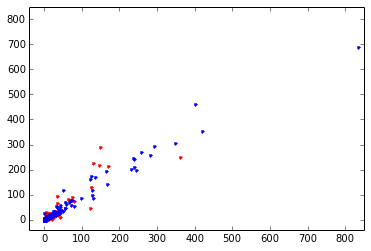

0.762804127774 1.83354120267 73.369355902 0.761890437907
1. feature 10  Households >$200K (0.196746)
2. feature 9  Households $150-200K (0.155740)
3. feature 8  Households $125-150K (0.104587)
4. feature 16  Pop 25-34 (0.094819)
5. feature 7  Households $100-124K (0.074143)
6. feature 18  Pop 35-44 (0.065480)
7. feature 17  Female 25-34 (0.045871)
8. feature 3  % Owning Homes (0.045776)
9. feature 24  Median Income (0.030604)
10. feature 12  Total Graduate Degree (0.027882)
11. feature 23  Female >65 (0.024500)
12. feature 13  % College Grads (0.019132)
13. feature 2  Households (0.018515)
14. feature 4  Households $50-60K (0.016023)
15. feature 19  Female 35-44 (0.015643)
16. feature 14  Pop 18-24 (0.015585)
17. feature 1  Population (0.014851)
18. feature 11  Total College Grads (0.010928)
19. feature 20  Pop 45-64 (0.006856)
20. feature 0  Incentive (0.005191)
21. feature 21  Female 45-64 (0.003556)
22. feature 15  Female 18-24 (0.002505)
23. feature 6  Households $75-100K (0.002209

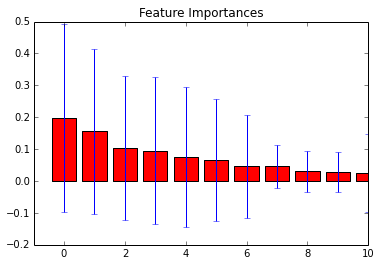

In [6]:
# random forest modeling

random = RandomForestRegressor(n_estimators=50)
random.fit(train_data, train_labels)

# Make predictions on dev data
dev_predictions = random.predict(dev_data)
# Predict train data to examine if model overfitted
train_predict = random.predict(train_data)

# examine score for test data
print random.score(dev_data, dev_labels)

plt.axis([-40, 850, -40, 850])
plt.plot(dev_labels, dev_predictions, 'r.')
plt.plot(train_labels, train_predict, 'b.')
plt.plot([0,0],[500,500],'r-')
plt.show()

_explained_variance_score = explained_variance_score(dev_labels, dev_predictions)
_mean_absolute_error = mean_absolute_error(dev_labels, dev_predictions)
_mean_squared_error = mean_squared_error(dev_labels, dev_predictions)
_r2_score = r2_score(dev_labels, dev_predictions)

print _explained_variance_score, _mean_absolute_error, _mean_squared_error, _r2_score

# predicting charging station count for Coppell Texas
#X_Coppell=np.array([39551,0.488938333,37.9,22.1,64572,0.721044394])
# print random.predict(X_Coppell)

# evaluate the importances of the features
importances = random.feature_importances_
std = np.std([tree.feature_importances_ for tree in random.estimators_],
            axis=0)
indices = np.argsort(importances)[::-1]

for f in range(25):
    print("%d. feature %d  %s (%f)" % ( f + 1, indices[f], feaname[indices[f]], importances[indices[f]]))

# plot the feature importances
plt.figure()
plt.title("Feature Importances")
plt.bar(range(25), importances[indices], 
       color='r', yerr=std[indices], align="center")
plt.xlim([-1,10])
plt.show()

0.702672605791


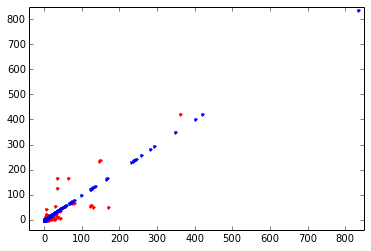

1. feature 7  Households $100-124K (0.044548)
2. feature 13  % College Grads (0.044012)
3. feature 5  Households $60-75K (0.043916)
4. feature 6  Households $75-100K (0.043894)
5. feature 19  Female 35-44 (0.043717)
6. feature 10  Households >$200K (0.043510)
7. feature 4  Households $50-60K (0.043315)
8. feature 17  Female 25-34 (0.042516)
9. feature 8  Households $125-150K (0.042500)
10. feature 2  Households (0.042260)
11. feature 21  Female 45-64 (0.041083)
12. feature 12  Total Graduate Degree (0.040391)
13. feature 20  Pop 45-64 (0.040078)
14. feature 1  Population (0.039842)
15. feature 23  Female >65 (0.039629)
16. feature 18  Pop 35-44 (0.039334)
17. feature 9  Households $150-200K (0.039105)
18. feature 15  Female 18-24 (0.038906)
19. feature 22  Pop >65 (0.038170)
20. feature 14  Pop 18-24 (0.037452)
21. feature 16  Pop 25-34 (0.036910)
22. feature 3  % Owning Homes (0.035897)
23. feature 11  Total College Grads (0.034015)
24. feature 24  Median Income (0.032662)
25. feature

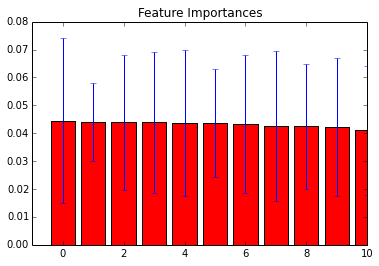

In [7]:
# try to rank importance of features from 250 Decision Trees 
from sklearn.ensemble import ExtraTreesClassifier

forest = ExtraTreesClassifier(n_estimators=250, random_state=0)
# fit the whole data set and calcualte feature importances
forest.fit(train_data, train_labels)

# Make predictions on dev data
dev_predictions = forest.predict(dev_data)
# Predict train data to examine if model overfitted
train_predict = forest.predict(train_data)

# examine score for test data
print forest.score(dev_data, dev_labels)

plt.axis([-40, 850, -40, 850])
plt.plot(dev_labels, dev_predictions, 'r.')
plt.plot(train_labels, train_predict, 'b.')
plt.show()

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
            axis=0)
indices = np.argsort(importances)[::-1]

for f in range(25):
    print("%d. feature %d  %s (%f)" % ( f + 1, indices[f], feaname[indices[f]], importances[indices[f]]))

# plot the feature importances
plt.figure()
plt.title("Feature Importances")
plt.bar(range(25), importances[indices], 
       color='r', yerr=std[indices], align="center")
plt.xlim([-1,10])
plt.show()

In [8]:
# import pandas
# to do's Friday night - use case - predict the most potential urban areas for EV adoption or growth
# use the best model - random forest model with the 10 attributes to:
# predict top urban area EV pravalence or CS counts
# write the predicted CS counts with numpy savetxt() - add a new column "Predicted Station Count"
# merge with the unparsed data with long/lat data 
# sort based on the difference of predicted versus actual counts
# the bigger the predicted - actual, the more potential there is for the urban area to adopt EV
# 
#reload all parsed urban area data with the same selected attributes as the first part of the modeling
X = np.loadtxt("data/parsed_urban_area_data_25.csv",delimiter = ',',usecols = (1,2,3,4,5,6,7,8,9,10,
                                                                              11,12,13,14,15,16,17,
                                                                              18,19,20,21,22,23,24,25)) 
# reload the actual labels
Y_actual = np.loadtxt("data/parsed_urban_area_data_25.csv",delimiter = ',',usecols = (0,),dtype=float)  

# predict charging station counts based on Random Forest model previously
Y_predict = random.predict(X)

# print X.shape, Y_actual.T.shape, Y_predict.T.shape

X1=np.column_stack((Y_predict, Y_actual, X))
# print X1

np.savetxt('predicted_urban_areas_25.csv', X1, fmt='%f',delimiter=',',newline='\n',header='',footer='')

